In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/AI/FP PKB/CropRecommendation.csv')

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

print(X)
print(y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


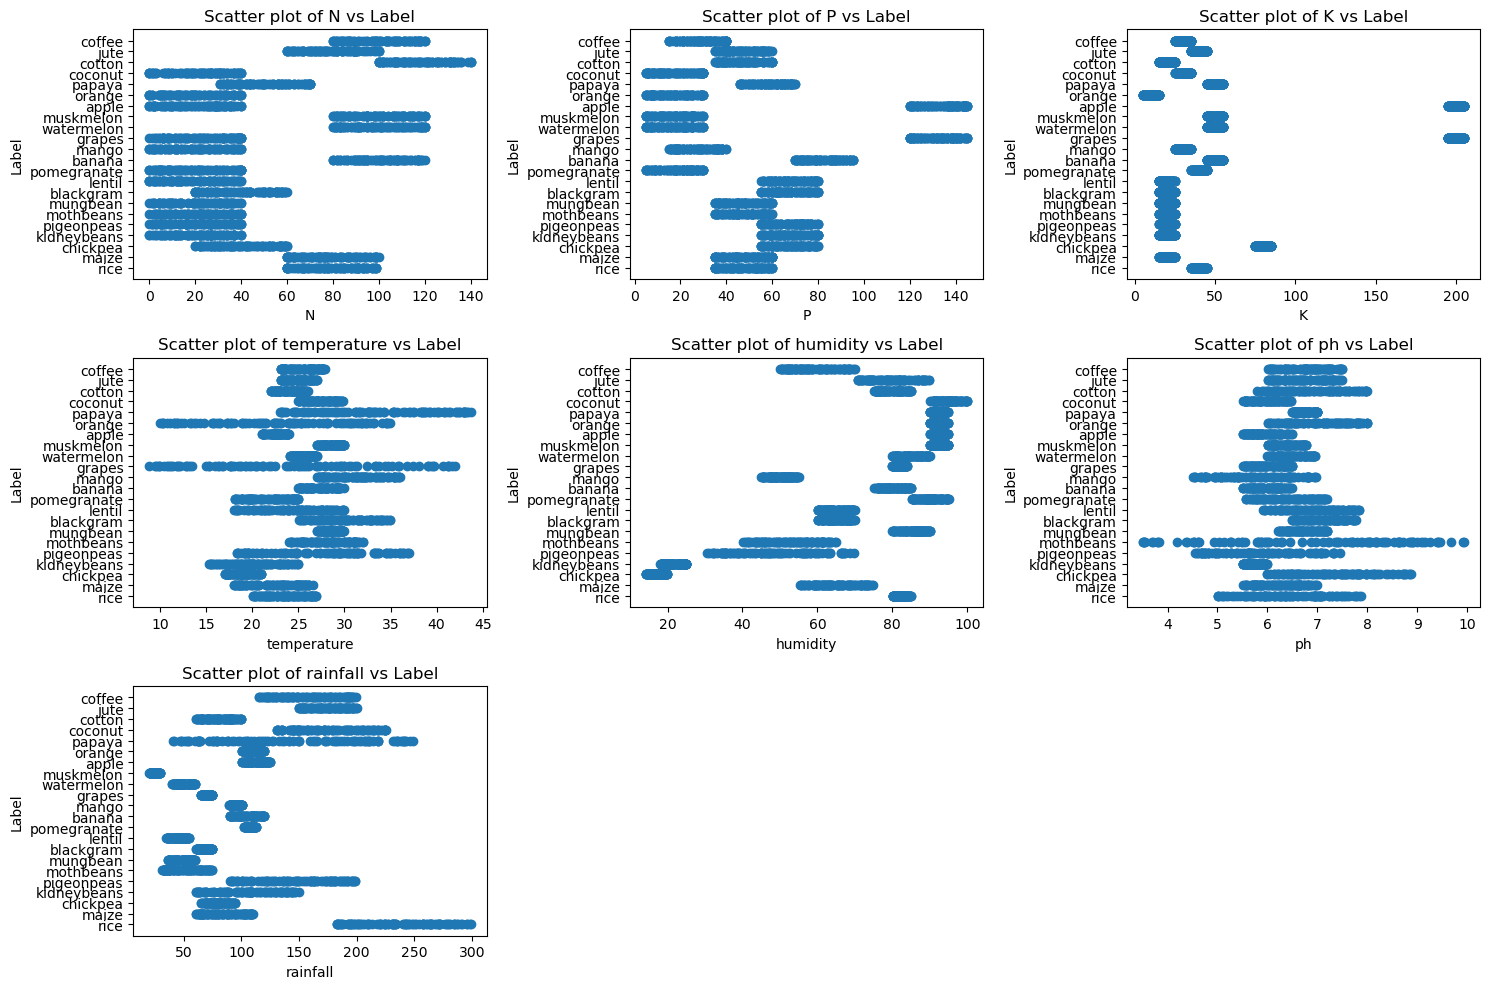

In [8]:
import matplotlib.pyplot as plt

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

plt.figure(figsize=(15, 10))

num_cols = 3
num_rows = (len(X.columns) + num_cols - 1) // num_cols

for i, column in enumerate(X.columns, 1):
    plt.subplot(num_rows, num_cols, i)

    plt.scatter(X[column], y)

    plt.xlabel(column)
    plt.ylabel('Label')
    plt.title(f'Scatter plot of {column} vs Label')

plt.tight_layout()

plt.show()

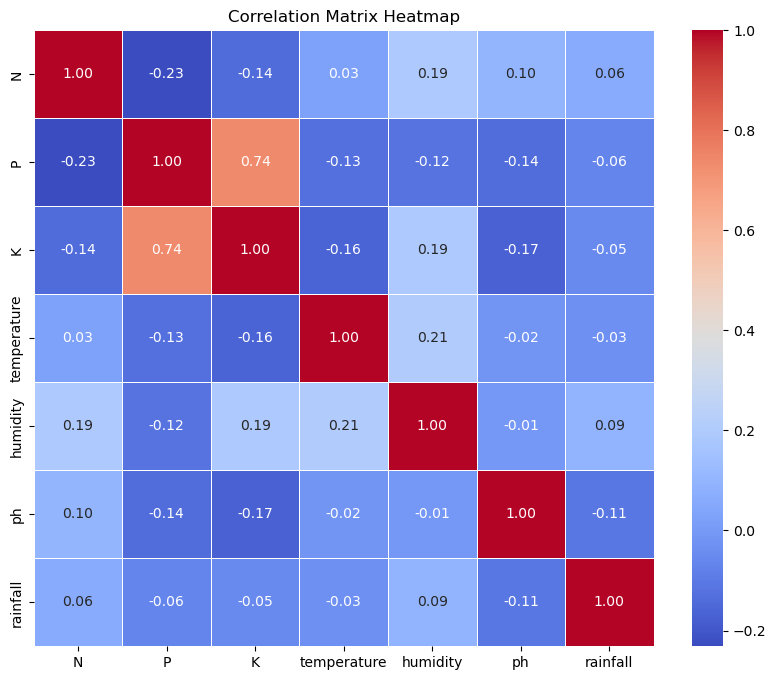

In [9]:
import seaborn as sns

corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()

k_folds = 5
cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.99545455 0.99090909 0.99545455 0.99545455 0.99772727]


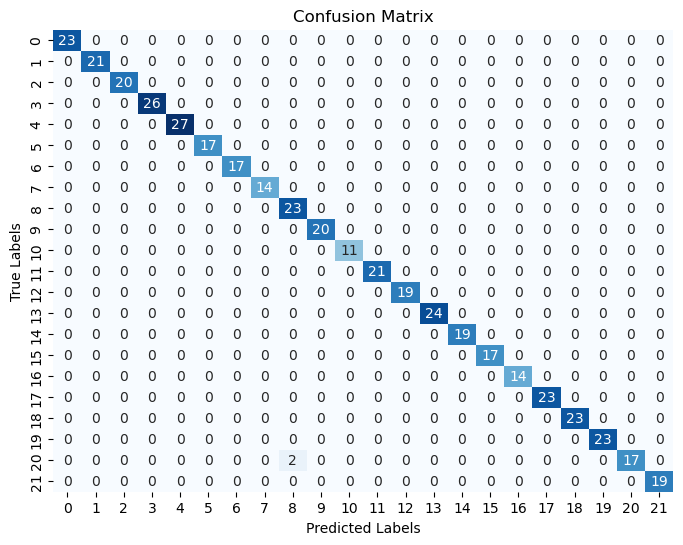

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(report)

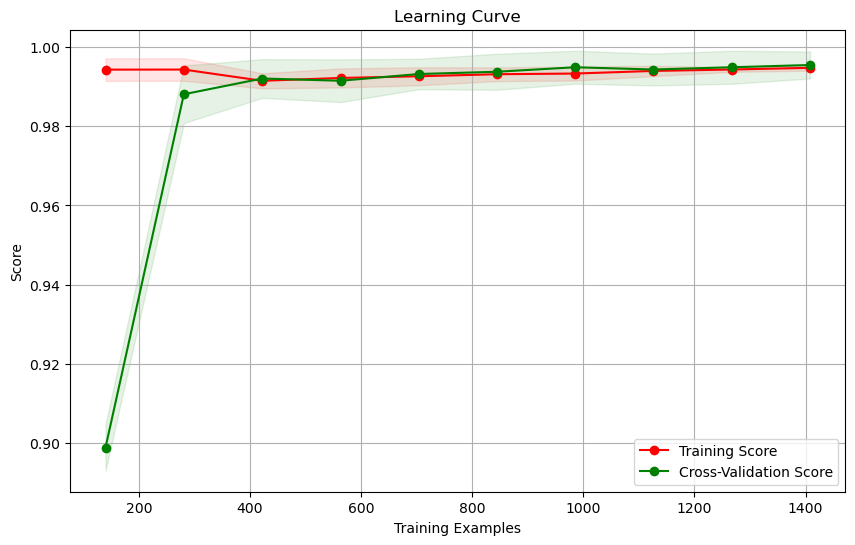

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluasi model dengan seleksi fitur

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)

selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)

selected_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_indices)

model_selected = model.fit(X_train_selected, y_train)

# Evaluate classifier on test set
X_test_selected = selector.transform(X_test)
accuracy = model_selected.score(X_test_selected, y_test)
print("Accuracy:", accuracy)


Indices of selected features: [0 1 2 4 6]
Accuracy: 0.990909090909091


Indices of selected features: [0 1 2 3 4]
Accuracy: 0.990909090909091
              precision    recall  f1-score   support

       apple      1.000     1.000     1.000        23
      banana      1.000     1.000     1.000        21
   blackgram      1.000     1.000     1.000        20
    chickpea      1.000     1.000     1.000        26
     coconut      1.000     1.000     1.000        27
      coffee      1.000     1.000     1.000        17
      cotton      1.000     1.000     1.000        17
      grapes      1.000     1.000     1.000        14
        jute      0.885     1.000     0.939        23
 kidneybeans      1.000     1.000     1.000        20
      lentil      0.917     1.000     0.957        11
       maize      1.000     1.000     1.000        21
       mango      1.000     1.000     1.000        19
   mothbeans      1.000     0.958     0.979        24
    mungbean      1.000     1.000     1.000        19
   muskmelon      1.000     1.000     1.000        17
      orang

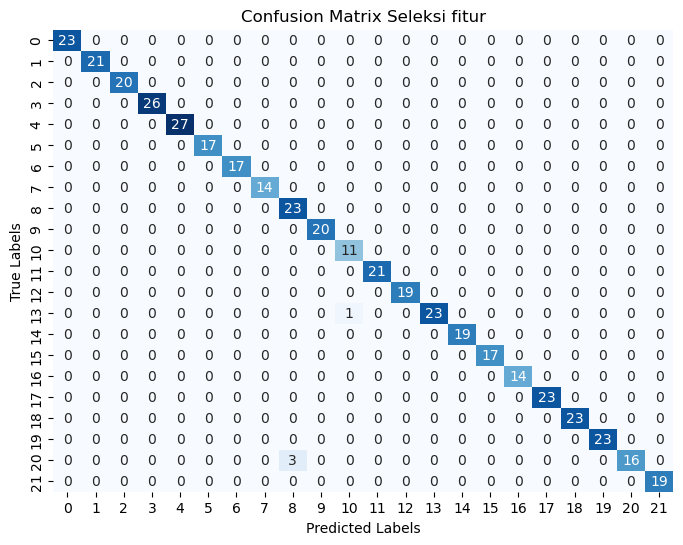

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asumsikan X_train dan X_test mengandung fitur-fitur kategorikal

# Encode fitur kategorikal
label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == object:
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])
        label_encoders[column] = le

# Feature selection
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
selected_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_indices)

# Fit the model with selected features
model_selected = model.fit(X_train_selected, y_train)

# Evaluate classifier on test set
X_test_selected = selector.transform(X_test)
y_pred = model_selected.predict(X_test_selected)

accuracy = model_selected.score(X_test_selected, y_test)
print("Accuracy:", accuracy)

# Print classification report with decimal numbers
report = classification_report(y_test, y_pred, digits=3)
print(report)

# Plot confusion matrix
cm_seleksi = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_seleksi, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Seleksi fitur')
plt.show()


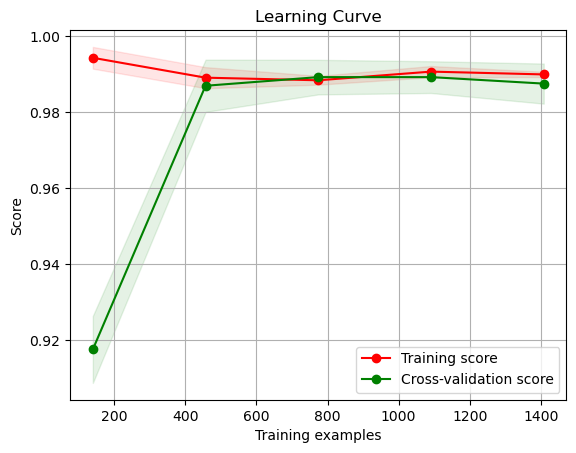

In [26]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming `model` is your classifier
plot_learning_curve(model_selected, "Learning Curve", X_train_selected, y_train, cv=5)
plt.show()

In [29]:
# Evaluate classifier on training set
y_train_pred = model_selected.predict(X_train_selected)
train_accuracy = model_selected.score(X_train_selected, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate classifier on test set
y_test_pred = model_selected.predict(X_test_selected)
test_accuracy = model_selected.score(X_test_selected, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9897727272727272
Test Accuracy: 0.990909090909091


### **PSO TIme**

In [15]:
pip install pyswarm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from pyswarm import pso

# Objective function to maximize cross-validation accuracy
def objective_function(params):
    var_smoothing = np.abs(params[0])
    prior_probs = np.abs(params[1:])
    prior_probs /= np.sum(prior_probs)  # Normalize prior probabilities
    clf = GaussianNB(var_smoothing=var_smoothing, priors=prior_probs)
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    return -accuracy  # Minimize negative accuracy

# Bounds for var_smoothing and prior probabilities
lb = [1e-9] + [0.1] * 22  # lower bounds for var_smoothing and prior probabilities
ub = [1e-1] + [0.9] * 22   # upper bounds for var_smoothing and prior probabilities

# Execute PSO
best_params, fopt = pso(objective_function, lb, ub, swarmsize=50, maxiter=100)

print(f"Optimal parameters: Var_smoothing={best_params[0]}, Priors={best_params[1:]}")
print(f"Maximum CV Accuracy: {-fopt}")

Stopping search: maximum iterations reached --> 100
Optimal parameters: Var_smoothing=1e-09, Priors=[0.47960664 0.15998958 0.1        0.14182431 0.7837439  0.1
 0.1        0.77020437 0.36376659 0.89993726 0.24827969 0.74733311
 0.9        0.30773191 0.9        0.41365187 0.670085   0.74706047
 0.4276355  0.86779568 0.54989381 0.69869951]
Maximum CV Accuracy: 0.9954545454545455


In [17]:
import pickle

# Simpan model terbaik ke dalam file pickle
with open('model_terbaik.pkl', 'wb') as file:
    pickle.dump(model_selected, file)

print("Model terbaik telah disimpan sebagai 'model_terbaik.pkl'")


Model terbaik telah disimpan sebagai 'model_terbaik.pkl'


In [18]:
# Simpan selector ke dalam file pickle
with open('selector.pkl', 'wb') as file:
    pickle.dump(selector, file)

print("Selector telah disimpan sebagai 'selector.pkl'")


Selector telah disimpan sebagai 'selector.pkl'


In [19]:
# import pickle
# import numpy as np

# # Memuat model terbaik dari file pickle
# with open('model_terbaik.pkl', 'rb') as file:
#     model_terbaik = pickle.load(file)

# # Memuat selector dari file pickle
# with open('selector.pkl', 'rb') as file:
#     selector = pickle.load(file)

# # Fungsi untuk mengambil input dari pengguna
# def get_user_input():
#     N = float(input("Masukkan nilai N: "))
#     P = float(input("Masukkan nilai P: "))
#     K = float(input("Masukkan nilai K: "))
#     # temperature = float(input("Masukkan nilai temperature: "))
#     humidity = float(input("Masukkan nilai humidity: "))
#     # ph = float(input("Masukkan nilai pH: "))
#     rainfall = float(input("Masukkan nilai rainfall: "))
#     return np.array([[N, P, K, humidity, rainfall]])

# # Mengambil input dari pengguna
# user_input = get_user_input()

# # # Seleksi fitur sesuai dengan model yang disimpan
# # user_input_selected = selector.transform(user_input)

# # Melakukan prediksi menggunakan model terbaik
# prediction = model_terbaik.predict(user_input)

# # Menampilkan hasil prediksi
# print(f"Hasil prediksi: {prediction[0]}")


In [20]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memuat model terbaik dari file pickle
with open('model_terbaik.pkl', 'rb') as file:
    model_terbaik = pickle.load(file)

# # Memuat selector dari file pickle
# with open('selector.pkl', 'rb') as file:
#     selector = pickle.load(file)

# Memuat dataset untuk uji
df = pd.read_csv('C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/AI/FP PKB/CropRecommendation.csv')

# Memisahkan fitur dan label
X = df[['N', 'P', 'K',  'humidity', 'rainfall']]
y = df['label']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Seleksi fitur untuk data test
# X_test_selected = selector.transform(X_test)

# Melakukan prediksi pada data test
y_pred = model_terbaik.predict(X_test_selected)

# Membuat DataFrame hasil uji
results_df = pd.DataFrame({'Data': X_test.index, 'Label Asli': y_test, 'Label Sebenarnya': y_pred})

# Menampilkan hasil uji
display(results_df)

# Menyimpan hasil uji ke dalam file Excel
results_df.to_excel('hasil_uji.xlsx', index=False)

,Data,Label Asli,Label Sebenarnya
1451,1451,muskmelon,muskmelon
1334,1334,watermelon,watermelon
1761,1761,papaya,papaya
1735,1735,papaya,papaya
1576,1576,apple,apple
...,...,...,...
59,59,rice,rice
71,71,rice,rice
1908,1908,cotton,cotton
1958,1958,cotton,cotton


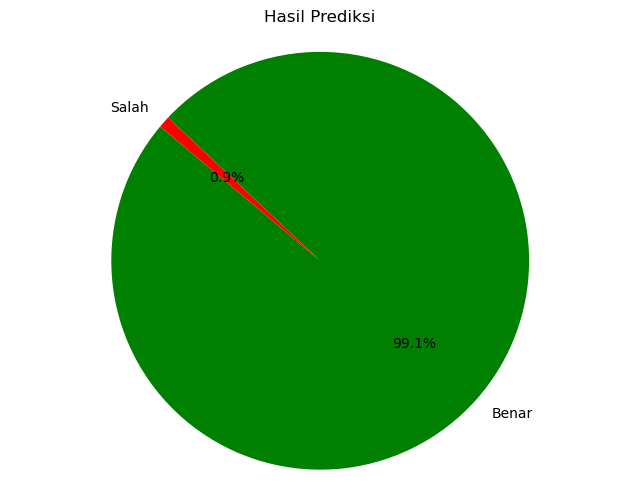

In [21]:
import matplotlib.pyplot as plt

# Menghitung jumlah prediksi yang benar dan salah
correct_predictions = results_df[results_df['Label Asli'] == results_df['Label Sebenarnya']].shape[0]
wrong_predictions = results_df.shape[0] - correct_predictions

# Membuat diagram pie
labels = ['Benar', 'Salah']
sizes = [correct_predictions, wrong_predictions]
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Hasil Prediksi')
plt.axis('equal')
plt.show()


In [22]:

# Menyimpan data latih dan data uji ke dalam file Excel
train_data = pd.DataFrame(X_train)
train_data['target'] = y_train

test_data = pd.DataFrame(X_test)
test_data['target'] = y_test

with pd.ExcelWriter('split_data.xlsx') as writer:
    train_data.to_excel(writer, sheet_name='Train Data', index=False)
    test_data.to_excel(writer, sheet_name='Test Data', index=False)